# Regressão Linear: Ridge e Lasso

### Dataset Iris

In [22]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import pandas as pd

In [3]:
X, _ = load_iris(return_X_y=True)

In [8]:
df = pd.DataFrame(data=X, columns=load_iris().feature_names)

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [17]:
y = df['petal length (cm)'].to_numpy()
X = df.drop(columns=['petal length (cm)']).to_numpy()

In [19]:
X[:10]

array([[5.1, 3.5, 0.2],
       [4.9, 3. , 0.2],
       [4.7, 3.2, 0.2],
       [4.6, 3.1, 0.2],
       [5. , 3.6, 0.2],
       [5.4, 3.9, 0.4],
       [4.6, 3.4, 0.3],
       [5. , 3.4, 0.2],
       [4.4, 2.9, 0.2],
       [4.9, 3.1, 0.1]])

In [20]:
y[:10]

array([1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

print(len(X_test), len(y_test))

45 45


## Regressão Ridge: reduzir overfit

### Regressão Comum

In [24]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

### Regressão Ridge com Alpha = 0.01

In [25]:
from sklearn.linear_model import Ridge

rr = Ridge(alpha=0.01) 
rr.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

### Regressão Ridge com Alpha = 100

In [26]:
rr100 = Ridge(alpha=100)
rr100.fit(X_train, y_train)

Ridge_train_score100 = rr100.score(X_train,y_train)
Ridge_test_score100 = rr100.score(X_test, y_test)

### Gráfico de comparação

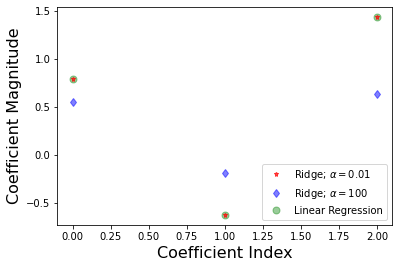

In [31]:
import matplotlib.pyplot as plt

plt.plot(rr.coef_, alpha=0.7, linestyle='none',marker='*',markersize=5,color='red',label=r'Ridge; $\alpha = 0.01$',zorder=7) 
plt.plot(rr100.coef_, alpha=0.5, linestyle='none',marker='d',markersize=6,color='blue',label=r'Ridge; $\alpha = 100$') 
plt.plot(lr.coef_, alpha=0.4, linestyle='none',marker='o',markersize=7,color='green',label='Linear Regression')

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)

plt.legend(fontsize=10,loc=4)
plt.show()

## Regressão Lasso: analisar features impactantes

In [37]:
lr = LinearRegression()
lr.fit(X_train,y_train)

lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)

print ("LR training score:", lr_train_score)
print ("LR test score: ", lr_test_score)

LR training score: 0.9720362636879499
LR test score:  0.9554496250632946


In [34]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso()
lasso.fit(X_train,y_train)

train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)

coeff_used = np.sum(lasso.coef_!=0)

print ("training score:", train_score) 
print ("test score: ", test_score)
print ("number of features used: ", coeff_used)

training score: 0.33130407252440275
test score:  0.32012764278731176
number of features used:  1


In [35]:
lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X_train,y_train)

train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)

coeff_used001 = np.sum(lasso001.coef_!=0)

print ("training score for alpha=0.01:", train_score001) 
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

training score for alpha=0.01: 0.9718063563217438
test score for alpha =0.01:  0.9559045452054491
number of features used: for alpha =0.01: 3


In [36]:
lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X_train,y_train)

train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)

coeff_used00001 = np.sum(lasso00001.coef_!=0)

print ("training score for alpha=0.0001:", train_score00001) 
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

training score for alpha=0.0001: 0.9720362482639009
test score for alpha =0.0001:  0.9554497069848301
number of features used: for alpha =0.0001: 3


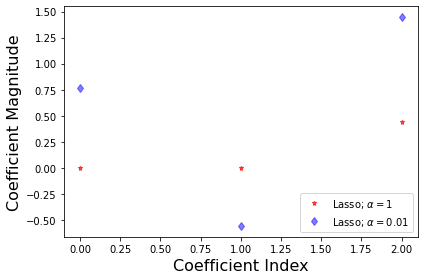

In [43]:
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)

plt.legend(fontsize=10,loc=4)
plt.tight_layout()
plt.show()

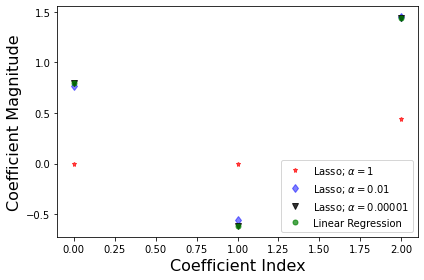

In [40]:
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',label='Linear Regression',zorder=2)

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)

plt.legend(fontsize=10,loc=4)
plt.tight_layout()
plt.show()